#### Importing Libraries

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

#### Reading in the Data - 3 seconds

In [98]:
data = pd.read_csv("D:/GTZAN/features_3_sec.csv")

In [99]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [100]:
label_index = dict()
index_label = dict()
for i, x in enumerate(data.label.unique()):
    label_index[x] = i
    index_label[i] = x

# update labels in data to index
data.label = [label_index[l] for l in data.label]

# shuffle samples
data = data.sample(frac=1, random_state=12).reset_index(drop=True)

###### We don't need the column 'filename' so let's remove it

In [101]:
data = data.iloc[0:, 1:] 
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.443286,0.080448,0.168675,0.000684,3316.813441,719531.313483,3065.352449,217024.360365,6970.215032,...,40.270874,-1.467690,28.548365,0.750436,28.724674,-3.561504,28.170456,-6.276354,26.619930,9
1,66149,0.525549,0.081804,0.068694,0.002262,1441.469060,379819.525270,1873.458852,262633.306791,3256.731333,...,37.476238,-2.416875,38.039639,0.435442,42.589233,-2.682204,23.545555,-1.145952,22.463905,8
2,66149,0.326120,0.075380,0.133758,0.000354,1687.721301,191781.131956,1966.239849,154894.677891,3588.922401,...,23.829321,-0.822906,26.236946,-1.017486,41.636135,-6.719857,45.255863,-3.302364,38.402519,9
3,66149,0.408677,0.083092,0.114431,0.000489,2254.918223,435982.227059,2218.479566,107968.465676,4730.016526,...,39.766754,-16.965317,45.699528,2.023049,31.421944,-10.037032,36.359509,-2.615890,29.043436,9
4,66149,0.210772,0.086844,0.116193,0.002542,1268.081915,72592.421898,1535.422488,26242.764173,2555.659931,...,19.036591,0.505144,17.527863,-4.957666,20.201040,-3.458240,28.302464,-9.887706,16.908688,5


###### Checking for missing values

In [102]:
data.isnull().sum()

length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean    

#### Input variables (X) and Output variable (Y)

In [103]:
y = data['label'] 
X = data.loc[:, data.columns != 'label']
features = X
labels = y
labels = np.array(labels).reshape(9990)

###### Normalizing X so that all the values are in the same range (0,1) 

In [104]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
 
X = pd.DataFrame(np_scaled, columns = cols)

In [105]:
min_max_scaler = preprocessing.MinMaxScaler()
features_scaled = min_max_scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)

#### Splitting the data into training and testing (70-30)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
# checking the shape of X_train and X_test
X_train.shape, X_test.shape

((6993, 58), (2997, 58))

####  Function to assess the accuracy of a model

In [108]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Accuracy using', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

### Logistic Regression

In [109]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

Accuracy using Logistic Regression : 0.67267 



In [110]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)
y_pred_test

array([6, 0, 1, ..., 9, 3, 7], dtype=int64)

### Support Vector Machine

In [111]:
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

Accuracy using Support Vector Machine : 0.7364 



#### Confusion Matrix - Logistic Regression

Accuracy : 0.67267 



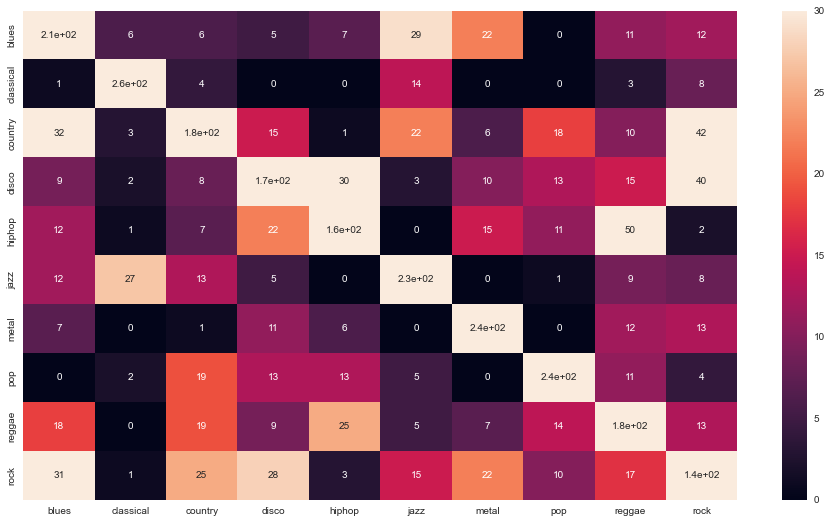

In [112]:
lg.fit(X_train, y_train)

preds = lg.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, annot=True, vmax = 30, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig('plots/Confusion Matrix - Logistic Regression.png')

#### Confusion Matrix - SVM

Accuracy : 0.7364 



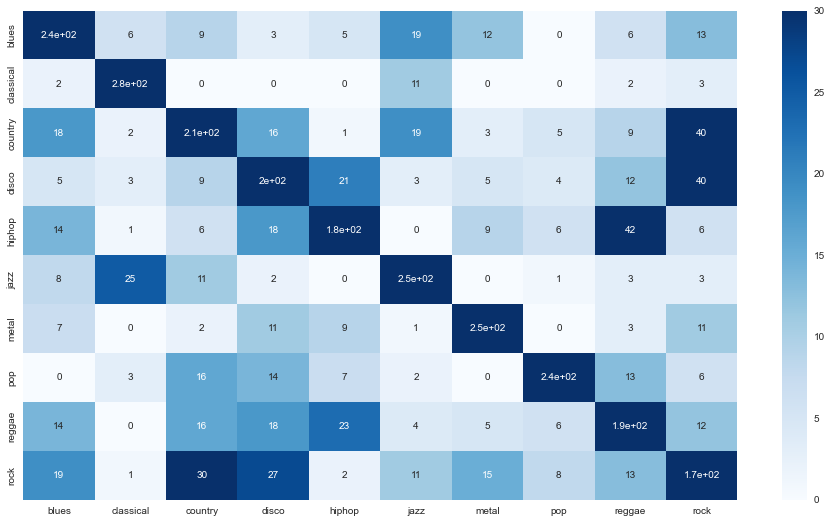

In [113]:
svm.fit(X_train, y_train)

preds = svm.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, vmax = 30, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig('plots/Confusion Matrix - SVM.png')

### Precision, Recall and F1 score - Logistic Regression

In [114]:
from sklearn.metrics import classification_report
classificationReport = classification_report(y_test, preds)
print(classificationReport)

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       310
           1       0.87      0.94      0.90       293
           2       0.68      0.65      0.67       324
           3       0.65      0.66      0.66       303
           4       0.73      0.64      0.68       282
           5       0.78      0.83      0.80       303
           6       0.84      0.85      0.84       293
           7       0.89      0.80      0.84       306
           8       0.65      0.66      0.66       291
           9       0.55      0.57      0.56       292

    accuracy                           0.74      2997
   macro avg       0.74      0.74      0.74      2997
weighted avg       0.74      0.74      0.74      2997



#### Plot of Classification Report

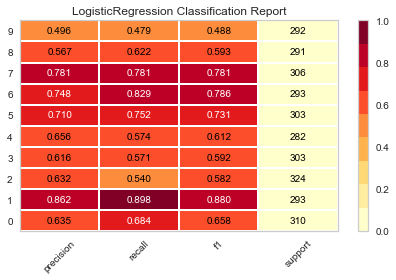

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [115]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(lg, support=True)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
plt.savefig('plots/Plot of Classification Report - LR.png')
visualizer.show()

### Precision, Recall and F1 score - SVM

In [116]:
from sklearn.metrics import classification_report
classificationReport = classification_report(y_test, preds)
print(classificationReport)

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       310
           1       0.87      0.94      0.90       293
           2       0.68      0.65      0.67       324
           3       0.65      0.66      0.66       303
           4       0.73      0.64      0.68       282
           5       0.78      0.83      0.80       303
           6       0.84      0.85      0.84       293
           7       0.89      0.80      0.84       306
           8       0.65      0.66      0.66       291
           9       0.55      0.57      0.56       292

    accuracy                           0.74      2997
   macro avg       0.74      0.74      0.74      2997
weighted avg       0.74      0.74      0.74      2997



##### Plot of Classification Report

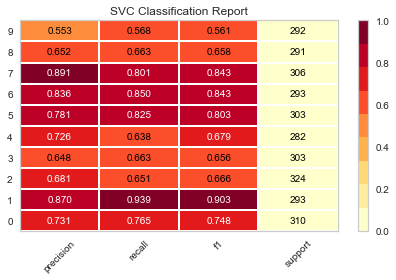

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [117]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(svm, support=True)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
plt.savefig('plots/Plot of Classification Report - SVM.png')
visualizer.show()

### ROC Curve - Logistic Regression

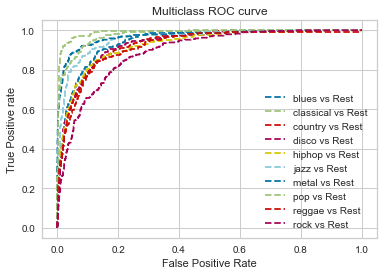

In [118]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
pred_prob = lg.predict_proba(X_test)
classes=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# Plot the ROC chart
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=classes[i] + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('plots/ROC Curve.png')
plt.show()


### Hyperparameter Tuning using GridSearchCV - Logistic Regression

In [119]:
b = list(range(1, X.shape[1]+1,5))
a = np.logspace(-4, 4, 12)
b

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56]

In [120]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', logistic_Reg)])

n_components = list(range(1,X.shape[1]+1,5))

C = np.logspace(-4, 4, 12)

penalty = ['l1', 'l2']

parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

clf_GS = GridSearchCV(pipe, parameters)

clf_GS.fit(X, y)

print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l2
Best C: 2.310129700083158
Best Number Of Components: 56

LogisticRegression(C=2.310129700083158)


In [121]:
new_lg = LogisticRegression(C=2.310129700083158, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [122]:
model_assess(new_lg, "Logistic Regression")

Accuracy using Logistic Regression : 0.68335 



### Final LR Accuracy after HyperParameter Tuning = 0.68335 

# SVM Model Tuning

##### Common function to find accuracy and plotting Confusion Matrix

In [123]:
def linear_classification_train(model, features, labels, test_split_size, title = "Default"):
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=test_split_size, random_state=42)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 4)*100, '\n')
    plt.figure()
    ax = sns.heatmap(
        confusion_matrix(y_test, preds), 
        square=True,annot = True,
        cmap=plt.cm.Blues
    )   
    plt.savefig('plots/'+ title + '.png')
    plt.show()

##### Testing different Parameters

Accuracy SVM linear kernel : 70.67 



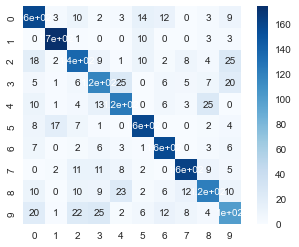

Accuracy SVM poly kernel of degree 2 : 73.72 



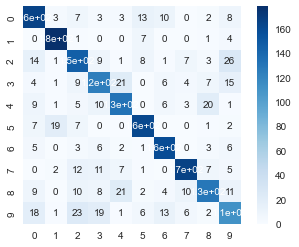

Accuracy SVM poly kernel of degree 3 : 79.38 



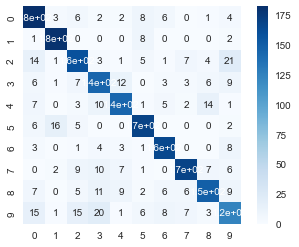

Accuracy SVM poly kernel of degree 4 : 84.23 



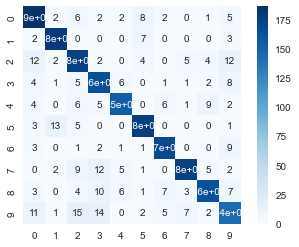

Accuracy SVM poly kernel of degree 5 : 86.83999999999999 



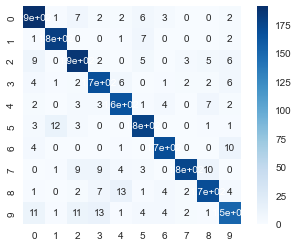

Accuracy SVM poly kernel of degree 6 : 87.39 



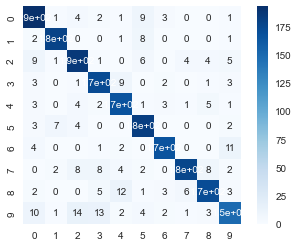

Accuracy SVM poly kernel of degree 7 : 88.24 



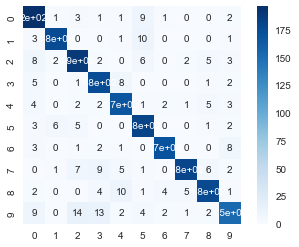

In [124]:
model = SVC(C=1.0,kernel='linear',random_state=0)
linear_classification_train(model, features_scaled, labels, 0.2, "SVM linear kernel")

model = SVC(C=1.0,kernel='poly',degree=2,random_state=0)
linear_classification_train(model, features_scaled, labels, 0.2, "SVM poly kernel of degree 2")

model = SVC(C=1.0,kernel='poly',degree=3,random_state=0)
linear_classification_train(model, features_scaled, labels, 0.2, "SVM poly kernel of degree 3")

model = SVC(C=1.0,kernel='poly',degree=4,random_state=0)
linear_classification_train(model, features_scaled, labels, 0.2, "SVM poly kernel of degree 4")

model = SVC(C=1.0,kernel='poly',degree=5,random_state=0)
linear_classification_train(model, features_scaled, labels, 0.2, "SVM poly kernel of degree 5")

model = SVC(C=1.0,kernel='poly',degree=6,random_state=0)
linear_classification_train(model, features_scaled, labels, 0.2, "SVM poly kernel of degree 6")

model = SVC(C=1.0,kernel='poly',degree=7,random_state=0)
linear_classification_train(model, features_scaled, labels, 0.2, "SVM poly kernel of degree 7")

Accuracy SVM rbf kernel c=10 : 82.78 



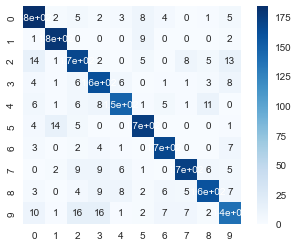

Accuracy SVM rbf kernel c=20 : 85.28999999999999 



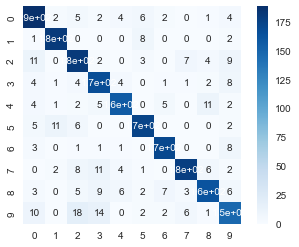

Accuracy SVM rbf kernel c=30 : 86.64 



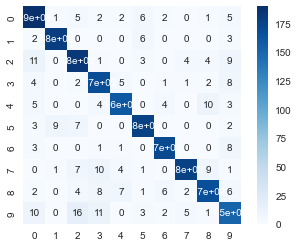

Accuracy SVM rbf kernel c=40 : 87.33999999999999 



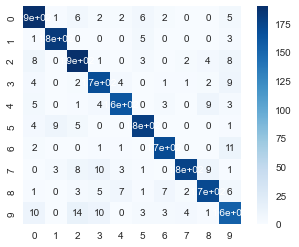

Accuracy SVM rbf kernel c=50 : 87.94 



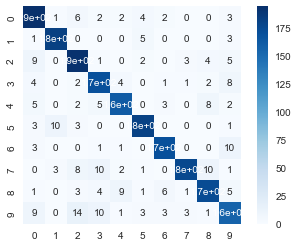

Accuracy SVM rbf kernel c=60 : 87.94 



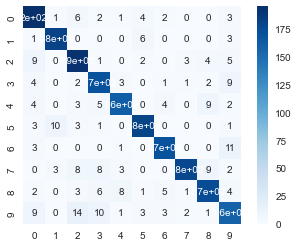

Accuracy SVM rbf kernel c=70 : 88.24 



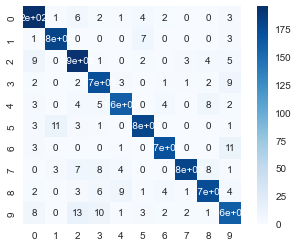

Accuracy SVM rbf kernel c=80 : 88.29 



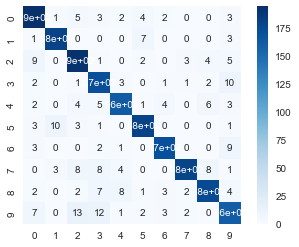

Accuracy SVM rbf kernel c=90 : 88.44 



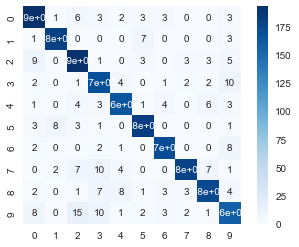

Accuracy SVM rbf kernel c=100 : 88.89 



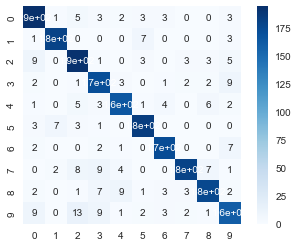

In [125]:
for i in range(10,101,10):
    model = SVC(C=i,kernel='rbf',random_state=0)
    linear_classification_train(model, features_scaled, labels, 0.2, "SVM rbf kernel c=" + str(i))

Accuracy SVM rbf kernel c=100 : 88.89 



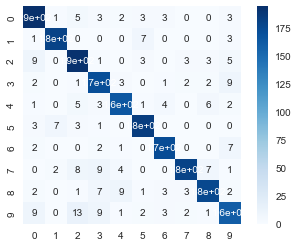

Accuracy SVM rbf kernel c=200 : 89.39 



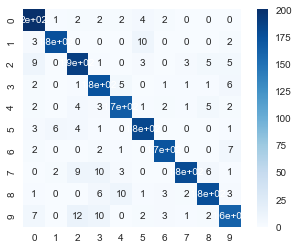

Accuracy SVM rbf kernel c=300 : 88.89 



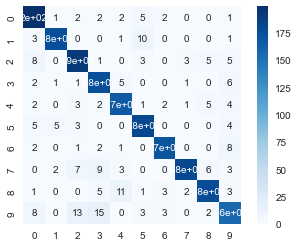

Accuracy SVM rbf kernel c=400 : 89.19 



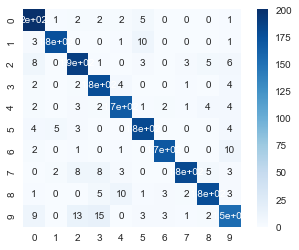

Accuracy SVM rbf kernel c=500 : 89.14 



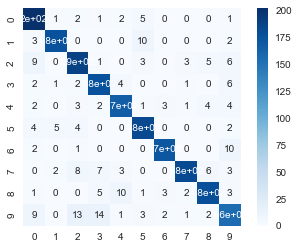

Accuracy SVM rbf kernel c=600 : 89.14 



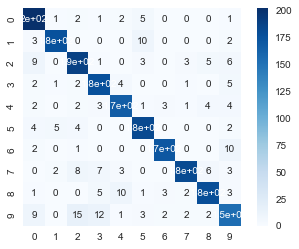

Accuracy SVM rbf kernel c=700 : 89.03999999999999 



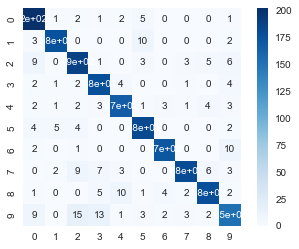

Accuracy SVM rbf kernel c=800 : 88.99000000000001 



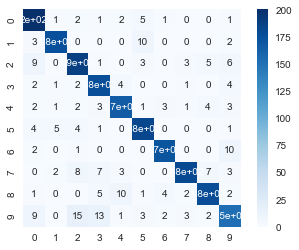

Accuracy SVM rbf kernel c=900 : 89.03999999999999 



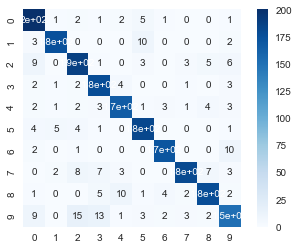

Accuracy SVM rbf kernel c=1000 : 88.99000000000001 



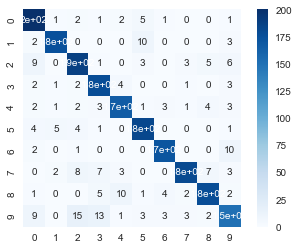

In [126]:
for i in range(100,1001,100):
    model = SVC(C=i,kernel='rbf',random_state=0)
    linear_classification_train(model, features_scaled, labels, 0.2, "SVM rbf kernel c=" + str(i))

Accuracy SVM rbf kernel c=200  : 89.39 



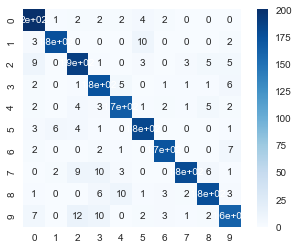

In [127]:
model = SVC(C=200,kernel='rbf',random_state=0)
linear_classification_train(model, features_scaled, labels, 0.2, "SVM rbf kernel c=200 ")

Accuracy SVM rbf kernel c=200 gamma=0.01 : 73.42 



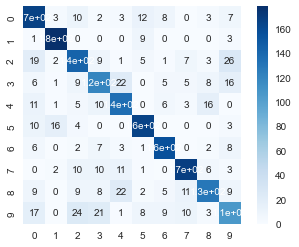

Accuracy SVM rbf kernel c=200 gamma=0.02 : 75.42999999999999 



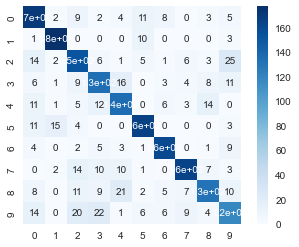

Accuracy SVM rbf kernel c=200 gamma=0.03 : 77.23 



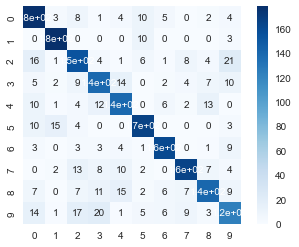

Accuracy SVM rbf kernel c=200 gamma=0.04 : 78.63 



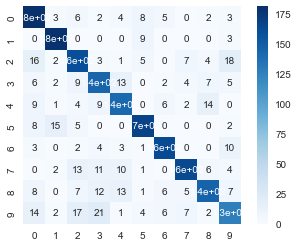

Accuracy SVM rbf kernel c=200 gamma=0.05 : 80.13 



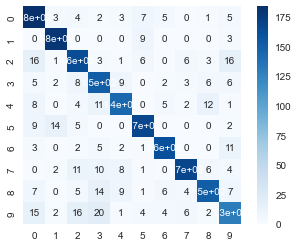

Accuracy SVM rbf kernel c=200 gamma=0.06 : 81.28 



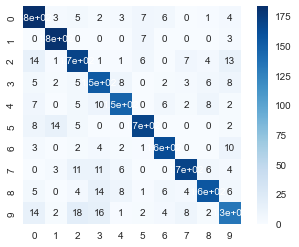

Accuracy SVM rbf kernel c=200 gamma=0.07 : 82.33 



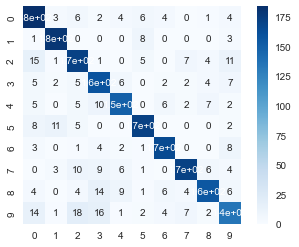

Accuracy SVM rbf kernel c=200 gamma=0.08 : 82.88 



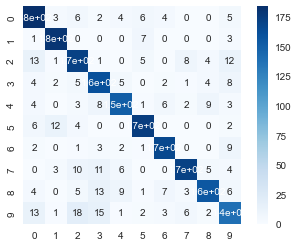

Accuracy SVM rbf kernel c=200 gamma=0.09 : 83.83 



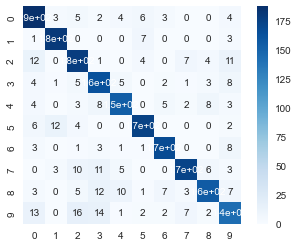

Accuracy SVM rbf kernel c=200 gamma=0.1 : 84.98 



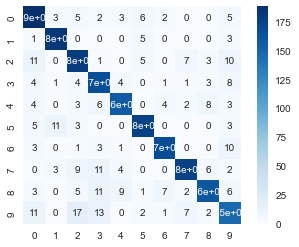

Accuracy SVM rbf kernel c=200 gamma=0.2 : 87.29 



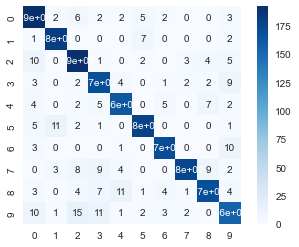

Accuracy SVM rbf kernel c=200 gamma=0.3 : 89.03999999999999 



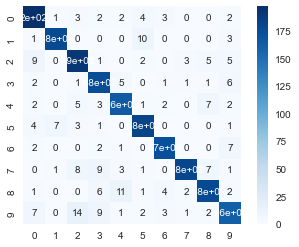

Accuracy SVM rbf kernel c=200 gamma=0.4 : 89.44 



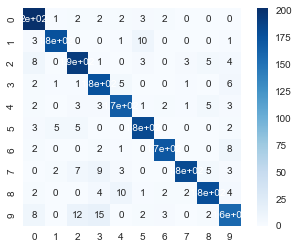

Accuracy SVM rbf kernel c=200 gamma=0.5 : 89.34 



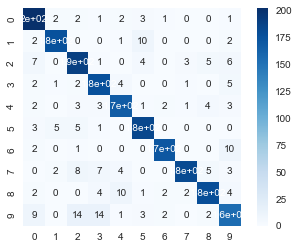

Accuracy SVM rbf kernel c=200 gamma=0.6 : 89.69 



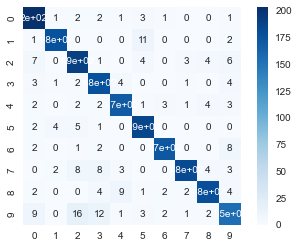

Accuracy SVM rbf kernel c=200 gamma=0.7 : 90.09 



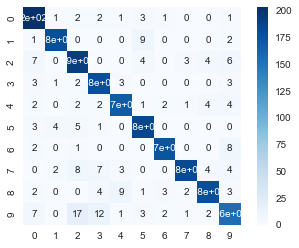

Accuracy SVM rbf kernel c=200 gamma=0.8 : 90.14 



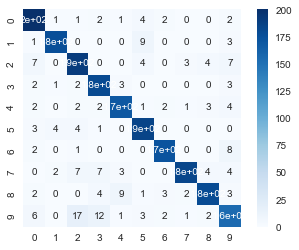

Accuracy SVM rbf kernel c=200 gamma=0.9 : 90.69 



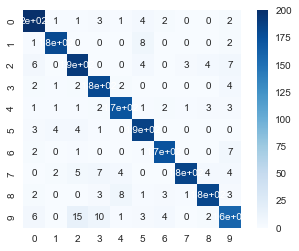

Accuracy SVM rbf kernel c=200 gamma=1.0 : 91.14 



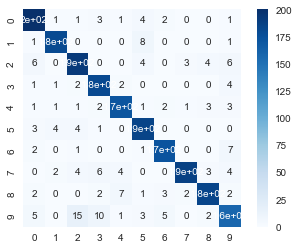

In [128]:
for i in range(1,10):
    model = SVC(C=200,kernel='rbf',random_state=0,gamma=i/100)
    linear_classification_train(model, features_scaled, labels, 0.2, "SVM rbf kernel c=200 gamma=" + str(i/100))
for i in range(1,11):
    model = SVC(C=200,kernel='rbf',random_state=0,gamma=i/10)
    linear_classification_train(model, features_scaled, labels, 0.2, "SVM rbf kernel c=200 gamma=" + str(i/10))

Accuracy SVM rbf kernel c=200 gamma=1 : 91.14 



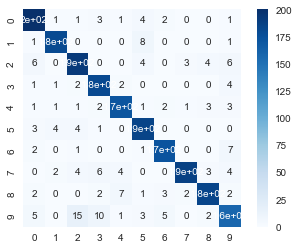

Accuracy SVM rbf kernel c=200 gamma=2 : 92.89 



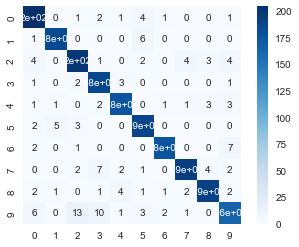

Accuracy SVM rbf kernel c=200 gamma=3 : 93.99 



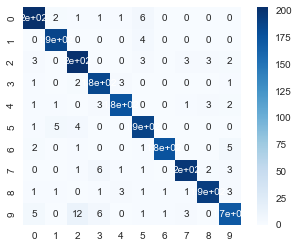

Accuracy SVM rbf kernel c=200 gamma=4 : 94.24 



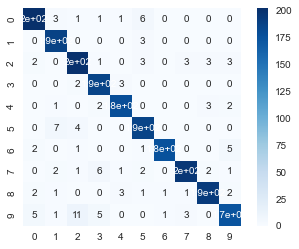

Accuracy SVM rbf kernel c=200 gamma=5 : 93.84 



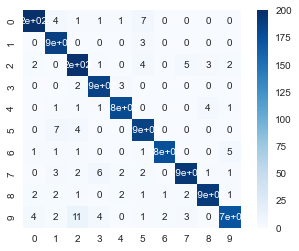

Accuracy SVM rbf kernel c=200 gamma=6 : 93.34 



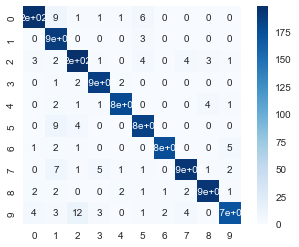

Accuracy SVM rbf kernel c=200 gamma=7 : 93.19 



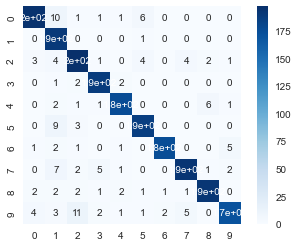

Accuracy SVM rbf kernel c=200 gamma=8 : 92.58999999999999 



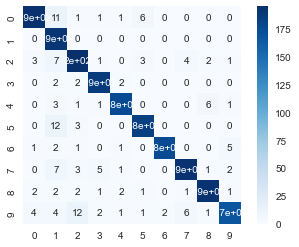

Accuracy SVM rbf kernel c=200 gamma=9 : 91.94 



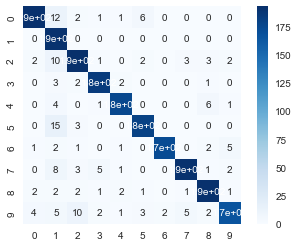

Accuracy SVM rbf kernel c=200 gamma=10 : 91.24 



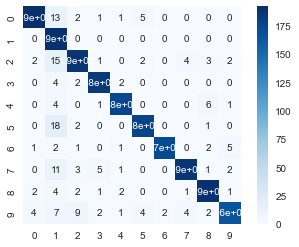

In [129]:
for i in range(1,11):
    model = SVC(C=200,kernel='rbf',random_state=0,gamma=i)
    linear_classification_train(model, features_scaled, labels, 0.2, "SVM rbf kernel c=200 gamma=" + str(i))

Accuracy SVM rbf kernel c=200 gamma=3 : 94.24 



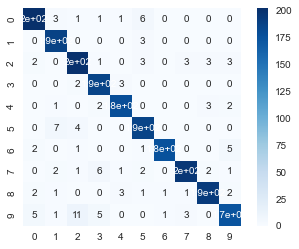

In [130]:
model = SVC(C=200,kernel='rbf',random_state=0,gamma=4)
linear_classification_train(model, features_scaled, labels, 0.2, "SVM rbf kernel c=200 gamma=" + str(3))

## Conclusion-

### Best Accuracy from Logistic Regression - 68.335

### Best Accuracy from SVM - 94.24
### Accuracy of SVM rbf kernel c=200 gamma=4 : 94.24